In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
correlation_matrix = df.corr()
print(correlation_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [4]:
# Список признаков для удаления
features_to_drop = ['residual sugar','fixed acidity','density','total sulfur dioxide' ,'free sulfur dioxide', 'pH', 'chlorides']
    
# Удаление признаков
df.drop(columns=features_to_drop,axis=1, inplace=True)

In [5]:
df.head()

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,5
1,0.88,0.00,0.68,9.8,5
2,0.76,0.04,0.65,9.8,5
3,0.28,0.56,0.58,9.8,6
4,0.70,0.00,0.56,9.4,5


In [6]:
df.isnull().sum().sum()

0

In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None,5, 10, 15, 20],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']  # Критерий оценки качества
}


In [10]:
regressor = DecisionTreeRegressor()

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [11]:
# Получение лучших параметров и модели
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Лучшие параметры: {best_params}')

Лучшие параметры: {'criterion': 'squared_error', 'max_depth': 7, 'max_leaf_nodes': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [12]:
# Прогнозирование с лучшей моделью
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_dt_test = mean_absolute_error(y_test, y_test_pred)
mse_dt_test = mean_squared_error(y_test, y_test_pred)
r2_dt_test = r2_score(y_test, y_test_pred)

print(f'Тестовый набор - MAE: {mae_dt_test}, MSE: {mse_dt_test}, R²: {r2_dt_test}')

Тестовый набор - MAE: 0.5615185377966656, MSE: 0.506481280555745, R²: 0.3019692714817189


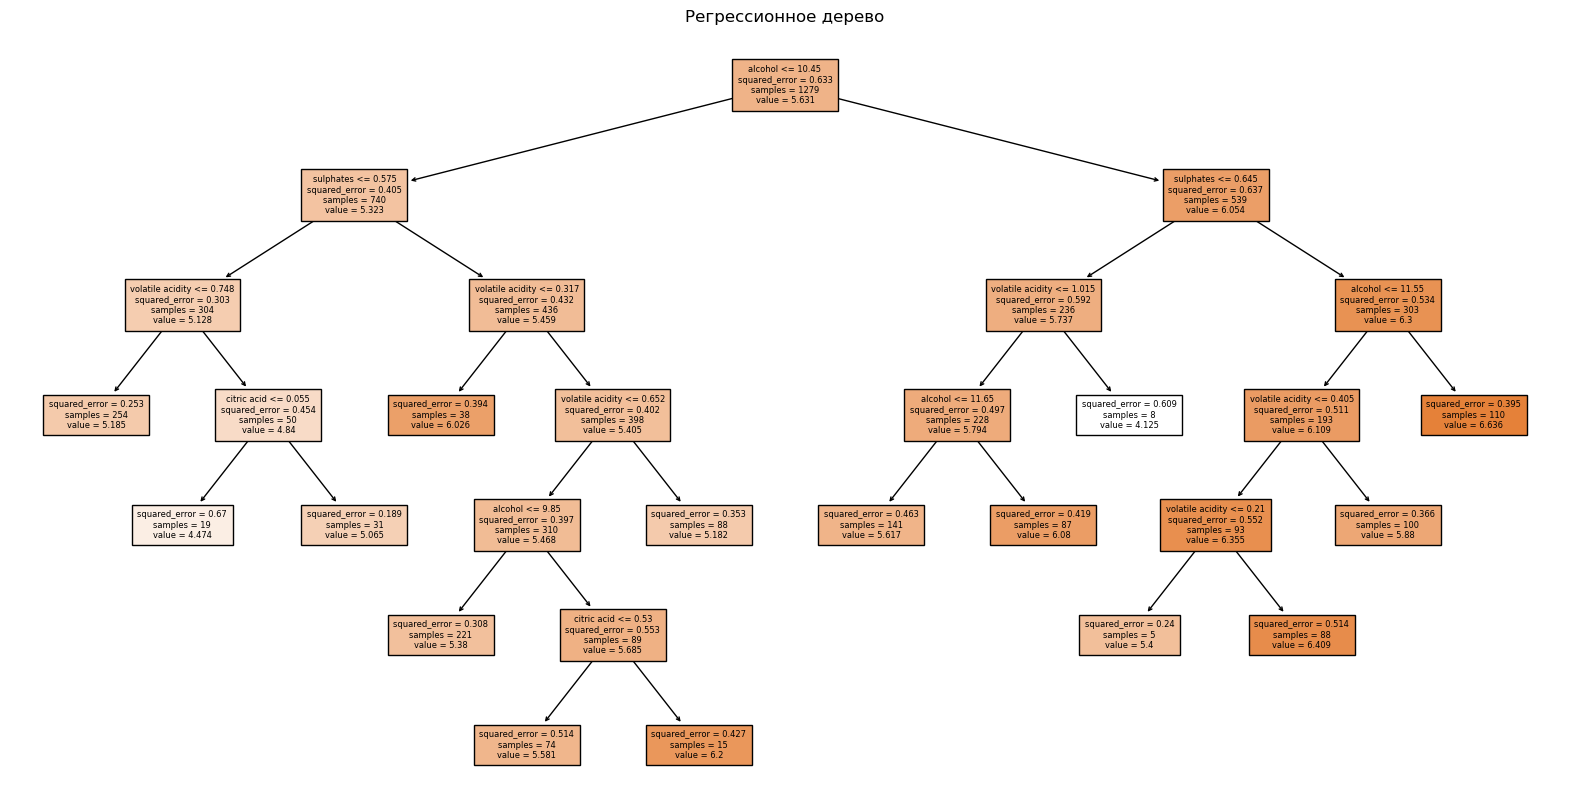

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names= df.columns[:-1], fontsize=6)
plt.title('Регрессионное дерево')
plt.show()

In [15]:
from sklearn.svm import SVR

param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10,],
    'gamma': ['scale']
}

# SVR с GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_svr_model = grid_search.best_estimator_

In [16]:
# Оценка модели
y_pred = best_svr_model.predict(X_test)
mae_svr_test = mean_absolute_error(y_test, y_pred)
mse_svr_test = mean_squared_error(y_test, y_pred)
r2_svr_test = r2_score(y_test, y_pred)

print(f'Лучшая модель SVR - MAE: {mae_svr_test:.4f}, MSE: {mse_svr_test:.4f}, R²: {r2_svr_test:.4f}')

# Печать лучших параметров
print("Лучшие параметры SVR:", grid_search.best_params_)

Лучшая модель SVR - MAE: 0.5498, MSE: 0.5312, R²: 0.2679
Лучшие параметры SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [118]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

In [120]:
data = pd.read_csv('winequality-red.csv')

In [122]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [124]:
X = data.drop('quality', axis=1)
y = data['quality']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [128]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [130]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Вводим форму входных данных
model.add(Dense(128, activation='relu'))  # Первый скрытый слой
model.add(Dropout(0.2))  # Регуляризация Dropout
model.add(Dense(64, activation='relu'))  # Второй скрытый слой
model.add(Dropout(0.2))  # Регуляризация Dropout
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

In [132]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [134]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 22.6901 - mae: 4.5633 - val_loss: 3.8157 - val_mae: 1.5560
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7111 - mae: 1.4520 - val_loss: 2.6185 - val_mae: 1.3190
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7718 - mae: 1.3289 - val_loss: 2.2345 - val_mae: 1.2204
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3360 - mae: 1.2231 - val_loss: 1.7097 - val_mae: 1.0832
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0381 - mae: 1.1591 - val_loss: 1.5341 - val_mae: 1.0256
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8513 - mae: 1.1008 - val_loss: 1.3888 - val_mae: 0.9728
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6883 - mae: 1.0282 - val_loss: 1.3826 - val_mae: 0.9735
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4416 - mae: 0.9580 - val_loss: 1.2090 - val_mae: 0.8957
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.24

In [147]:
# Оценка модели
loss, mae_nn_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Вычисляем MSE и R²
mse_nn_test = mean_squared_error(y_test, y_pred)
r2_nn_test = r2_score(y_test, y_pred)

print(f'Средняя абсолютная ошибка: {mae_nn_test}')
print(f'Среднеквадратичная ошибка (MSE): {mse_nn_test}')
print(f'Коэффициент детерминации (R²): {r2_nn_test}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3775 - mae: 0.4464  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Средняя абсолютная ошибка: 0.48050060868263245
Среднеквадратичная ошибка (MSE): 0.4276990453278273
Коэффициент детерминации (R²): 0.385710527356801


In [ ]:
from sklearn.preprocessing import StandardScaler

# Сравнение метрик
metrics = {
    'MAE': [mae_svr_test, mae_dt_test, mae_nn_test],
    'MSE': [mse_svr_test, mse_dt_test, mse_nn_test],
    'R²': [r2_svr_test, r2_dt_test, r2_nn_test]
}

labels = ['SVR', 'Decision Tree', 'Simple Neural Network']

x = np.arange(len(labels))  # Метки для групп
width = 0.2  # Ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))

# Построение столбиков для каждой метрики
for i, (metric_name, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i * width, values, width, label=metric_name)

    # Добавим значения над столбцами
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

# Настройка графика
ax.set_ylabel('Значения метрик')
ax.set_title('Сравнение метрик производительности SVR и Decision Tree Regressor')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()